# Lymphography Data Set- Neural Networks

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Perform EDA


In [2]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [3]:
### Load the data
df = pd.read_csv("lymphography.csv", names=col_names)
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [4]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [5]:
df["class"].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

In [6]:
df.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

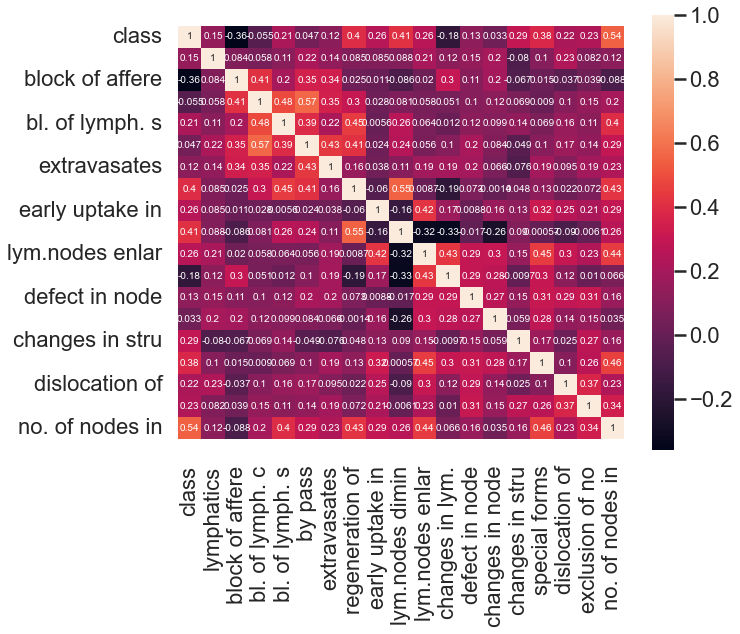

In [8]:
#Heatmap to show the correlation between various variables of the dataset
plt.figure(figsize=(10, 8))
cor = df.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

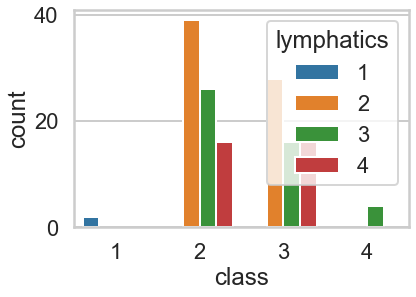

In [9]:
 sns.countplot(df['class'],hue=df['lymphatics'])

C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class'>

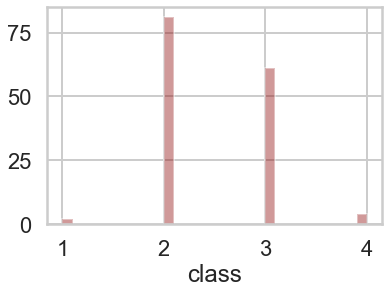

In [10]:
sns.distplot(df['class'],kde=False,color='darkred',bins=30)

### Imblearn SMOTH algorithm and test the model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [12]:
X = df.drop(columns=['class'])
y = df['class']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Accuracy  0.8222222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.82      0.92      0.87        25
           3       0.81      0.72      0.76        18
           4       0.00      0.00      0.00         1

    accuracy                           0.82        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.80      0.82      0.81        45



C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision

<AxesSubplot:>

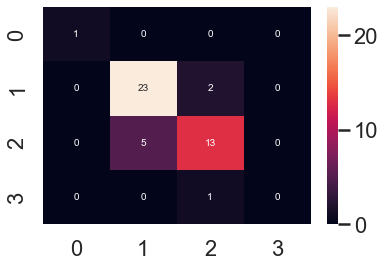

In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [14]:
np.bincount(y_train)


array([ 0,  1, 56, 43,  3], dtype=int64)

In [15]:
from imblearn.over_sampling import SMOTE 
# transform the dataset
oversample = SMOTE(k_neighbors = 1)
X_train_res,y_train_res  = oversample.fit_resample(X,y)



Accuracy  0.9111111111111111
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.89      0.96      0.92        25
           3       0.94      0.83      0.88        18
           4       1.00      1.00      1.00         1

    accuracy                           0.91        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.91      0.91      0.91        45



C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

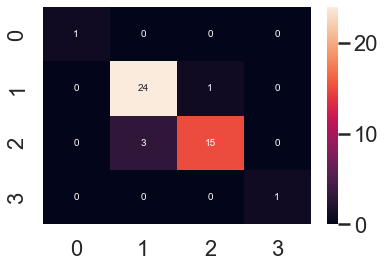

In [16]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [17]:
np.bincount(y_train_res)


array([ 0, 81, 81, 81, 81], dtype=int64)

### Tensorflow keras neural networks

In [18]:
!pip install tensorflow
!pip install keras

In [19]:
from tensorflow.keras.layers import Dense #NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [20]:
features = df.drop(columns=['class'])
target = df['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [46]:
model = Sequential()

model.add(Dense(100, input_shape=(features.shape[1],)))
model.add(Dense(30, activation="relu"))
# model.add(Dense(45, activation="relu"))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(23, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1900      
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 5,023
Trainable params: 5,023
Non-trainable params: 0
_________________________________________________________________


In [43]:
import tensorflow

model.compile(optimizer="sgd", 
              loss=tensorflow.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [26]:
X_train.shape

(83, 18)

In [27]:
y_train.shape

(83,)

In [44]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [29]:
y_pred

array([[0.23319678, 0.26447695, 0.50232625],
       [0.14664485, 0.30903333, 0.5443218 ],
       [0.1391114 , 0.36011592, 0.50077266],
       [0.23312922, 0.3939098 , 0.37296095],
       [0.2218253 , 0.40092307, 0.37725163],
       [0.2597883 , 0.40183392, 0.33837777],
       [0.11794161, 0.3737698 , 0.5082886 ],
       [0.23671894, 0.32784367, 0.43543744],
       [0.16818425, 0.2971294 , 0.5346863 ],
       [0.20896234, 0.34253308, 0.44850457],
       [0.26308814, 0.39405832, 0.3428535 ],
       [0.19173793, 0.27467892, 0.5335831 ],
       [0.28646266, 0.3830741 , 0.33046323],
       [0.1305787 , 0.32507434, 0.5443469 ],
       [0.12950605, 0.30974174, 0.5607522 ],
       [0.1576824 , 0.35682678, 0.48549086],
       [0.15989009, 0.462706  , 0.37740397],
       [0.22840208, 0.36824033, 0.40335765],
       [0.11159379, 0.36595553, 0.5224507 ],
       [0.18312195, 0.30981562, 0.5070624 ],
       [0.2504122 , 0.38436148, 0.36522627],
       [0.22669986, 0.24725315, 0.526047  ],
       [0.

### Tune the Model using GridSearchCv

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\ALISHA ANJUM\OneDrive\Attachments\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [33]:

print(clf.best_params_)

print(clf.best_score_)

{'classifier': RandomForestClassifier(max_features=6, n_estimators=90), 'classifier__max_features': 6, 'classifier__n_estimators': 90}
0.8794117647058822


### Plot the Accuracy and Loss graphs

Epoch 1/3
3/3 [==============================] - 0s 4ms/step - loss: 4.8229 - accuracy: 0.2770
Epoch 2/3
3/3 [==============================] - 0s 4ms/step - loss: 4.8221 - accuracy: 0.1757
Epoch 3/3
3/3 [==============================] - 0s 3ms/step - loss: 4.8218 - accuracy: 0.2095
dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

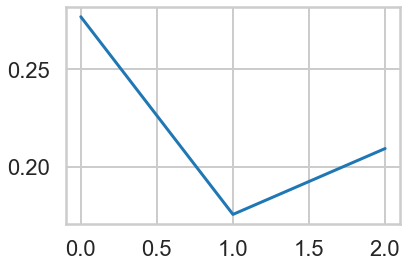

In [51]:
X = df.drop(columns=['class'])
y = df['class']
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])


history = model.fit(X,y,steps_per_epoch=3,
                    epochs=3,validation_steps=5)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()